<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/3_Project/4_Salary_Analysis.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# How well do jobs and skills pay for Data Analysts?

#### Methodology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

#### Original Exploration

[18_Matplotlib_Box_Plots.ipynb](../2_Advanced/18_Matplotlib_Box_Plots.ipynb)  
[19_Exercise_Skill_Pay_Analysis.ipynb](../2_Advanced/19_Exercise_Skill_Pay_Analysis.ipynb)

## Import Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Salary Distribution by Job Title

Filter our data to only include salary values from the United States.

In [2]:
df_us = df[df['job_country'] == 'United States']

Create a list of the main job_titles in our dataset and filter our dataframe to only contain these job titles.

In [3]:
main_job_titles = df_us.groupby('job_title_short').size().sort_values(ascending=False).head(6).index.to_list()

df_us_main_jobs = df_us[df_us['job_title_short'].isin(main_job_titles)]

main_job_titles

['Data Analyst',
 'Data Scientist',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst',
 'Senior Data Engineer']

## Plot Salary Distributions

Plot the top 6 job titles salary distributions using a box plot.

Text(0.5, 1.0, 'Salary Distribution of Data Jobs in the US')

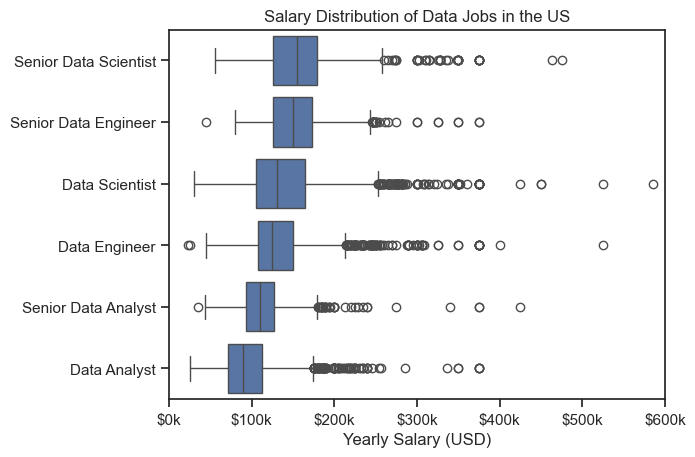

In [4]:
job_order = df_us_main_jobs.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

sns.set_theme(style='ticks')
sns.boxplot(data=df_us_main_jobs, x='salary_year_avg', y='job_title_short', order=job_order)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))
plt.xlim(0, 600000)
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.title('Salary Distribution of Data Jobs in the US')

## Investigate Median Salary Vs Skill for Data Analysts

Filters the original dataset to only get rows where the job title is 'Data Analyst' and the country is 'United States', to create a new DataFrame `df_DA_US`. Drop NaN values from the 'salary_year_avg' column. Then it uses the `explode` method on the `job_skills` column to create a new row in the DataFrame for each skill associated with a job. Finally, it displays the first five entries of the `salary_year_avg` and `job_skills` columns.

In [5]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']].head()

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


## Determine The Highest Paid Skills and Most Demanded Skills

Gets the top ten highest-paying skills for Data Analysts by calculating the median salary for each skill listed in the `df_DA_US`. It groups the data by job skills, computes the median salary, sorts these values in descending order by median, and then selects the top 10. This is then formatted into a new DataFrame (`df_DA_top_pay`) with a reset index and a renamed salary column labeled 'median_salary'.

In [7]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10).reset_index()

df_DA_top_pay

,job_skills,count,median
0,dplyr,2,196250.0
1,bitbucket,3,189000.0
2,gitlab,3,186000.0
3,solidity,1,179000.0
4,hugging face,1,175000.0
5,couchbase,1,160515.0
6,ansible,1,159640.0
7,mxnet,2,149000.0
8,cassandra,6,148250.0
9,vmware,1,147500.0


Calculates the count and median salary for each skill in `df_DA_US`. It groups the data by `job_skills`, aggregates it to find the count and median salary for each skill, and then sorts the results by count in descending order by count. It re-sorts this subset by median salary in descending order.

In [9]:
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


Creates two horizontal bar charts: 
1. Displays the highest paid skills 
2. Shows the most in demand skills 

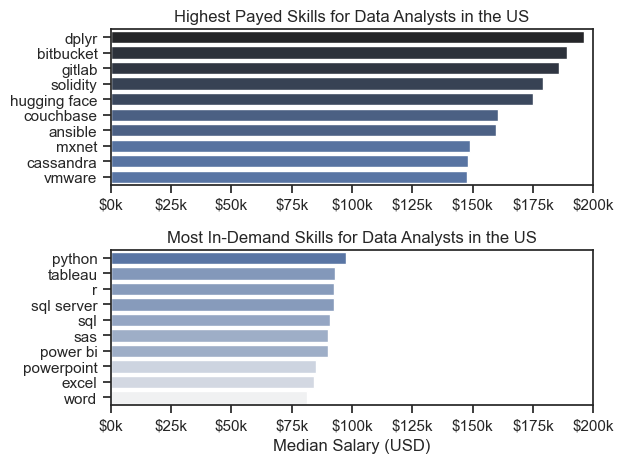

In [ ]:
fig, ax = plt.subplots(2,1)

sns.barplot(data=df_DA_top_pay, x='median', y='job_skills', ax=ax[0], hue='median', palette='dark:b_r', legend=False)
ax[0].set_xlim(0, 200000)
ax[0].set_ylabel('')
ax[0].set_title('Highest Payed Skills for Data Analysts in the US')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))


sns.barplot(data=df_DA_skills, x='median', y='job_skills', ax=ax[1], hue='median', palette='light:b', legend=False)
ax[1].set_xlim(0, 200000)
ax[1].set_ylabel('')
ax[1].set_title('Most In-Demand Skills for Data Analysts in the US')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

fig.tight_layout()